In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train_modified.csv')

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.rename(columns={
    'FAVC': 'frequent_consumption_of_high_caloric_food',
    'FCVC': 'frequency_of_consumption_of_vegetables',
    'NCP': 'number_of_main_meals',
    'CAEC': 'consumption_of_food_between_meals',
    'CH20': 'consumption_of_water_daily',
    'CALC': 'consumption_of_alcohol',
    'SCC': 'calories_consumption_monitoring',
    'FAF': 'physical_activity_frequency',
    'TUE': 'time_using_technology_devices',
    'MTRANS': 'transportation_used',
    'NObeyesdad': 'obesity_level'
}, inplace=True)

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,CH2O,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.replace('', pd.NA, inplace=True)

In [ ]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column before replacement:\n", null_values)

# Replace null values in numerical columns with the mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Replace null values in categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

Null values in each column before replacement:
 id                                           0
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
frequent_consumption_of_high_caloric_food    0
frequency_of_consumption_of_vegetables       1
number_of_main_meals                         0
consumption_of_food_between_meals            0
SMOKE                                        0
CH2O                                         0
calories_consumption_monitoring              0
physical_activity_frequency                  0
time_using_technology_devices                0
consumption_of_alcohol                       0
transportation_used                          0
obesity_level                                0
dtype: int64


In [ ]:
null_values_after = df.isnull().sum()
print("\nNull values in each column after replacement:\n", null_values_after)


Null values in each column after replacement:
 id                                           0
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
frequent_consumption_of_high_caloric_food    0
frequency_of_consumption_of_vegetables       0
number_of_main_meals                         0
consumption_of_food_between_meals            0
SMOKE                                        0
CH2O                                         0
calories_consumption_monitoring              0
physical_activity_frequency                  0
time_using_technology_devices                0
consumption_of_alcohol                       0
transportation_used                          0
obesity_level                                0
dtype: int64


In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# List of columns for which we want to print unique values
columns = [
    'Gender', 'family_history_with_overweight', 'frequent_consumption_of_high_caloric_food',
    'consumption_of_food_between_meals', 'SMOKE', 'calories_consumption_monitoring',
    'consumption_of_alcohol', 'transportation_used', 'obesity_level'
]

# Print unique values for each applicable column
unique_values = {col: df[col].unique().tolist() for col in columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")


Gender: ['Male', 'Female']
family_history_with_overweight: ['yes', 'no', ' ']
frequent_consumption_of_high_caloric_food: ['yes', 'no']
consumption_of_food_between_meals: ['Sometimes', 'Frequently', 'no', 'Always']
SMOKE: ['no', 'yes']
calories_consumption_monitoring: ['no', 'yes']
consumption_of_alcohol: ['Sometimes', 'no', 'Frequently']
transportation_used: ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike']
obesity_level: ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I']


In [ ]:
# List of columns for which we want to print value counts
columns_to_count = [
    'Gender', 'family_history_with_overweight', 'frequent_consumption_of_high_caloric_food',
    'consumption_of_food_between_meals', 'SMOKE', 'calories_consumption_monitoring'
]

# Print value counts for each column
for col in columns_to_count:
    print(df[col].value_counts())
    print()


Gender
Female    2530
Male      2469
Name: count, dtype: int64

family_history_with_overweight
yes    4055
no      943
          1
Name: count, dtype: int64

frequent_consumption_of_high_caloric_food
yes    4554
no      445
Name: count, dtype: int64

consumption_of_food_between_meals
Sometimes     4196
Frequently     631
Always         109
no              63
Name: count, dtype: int64

SMOKE
no     4952
yes      47
Name: count, dtype: int64

calories_consumption_monitoring
no     4809
yes     190
Name: count, dtype: int64



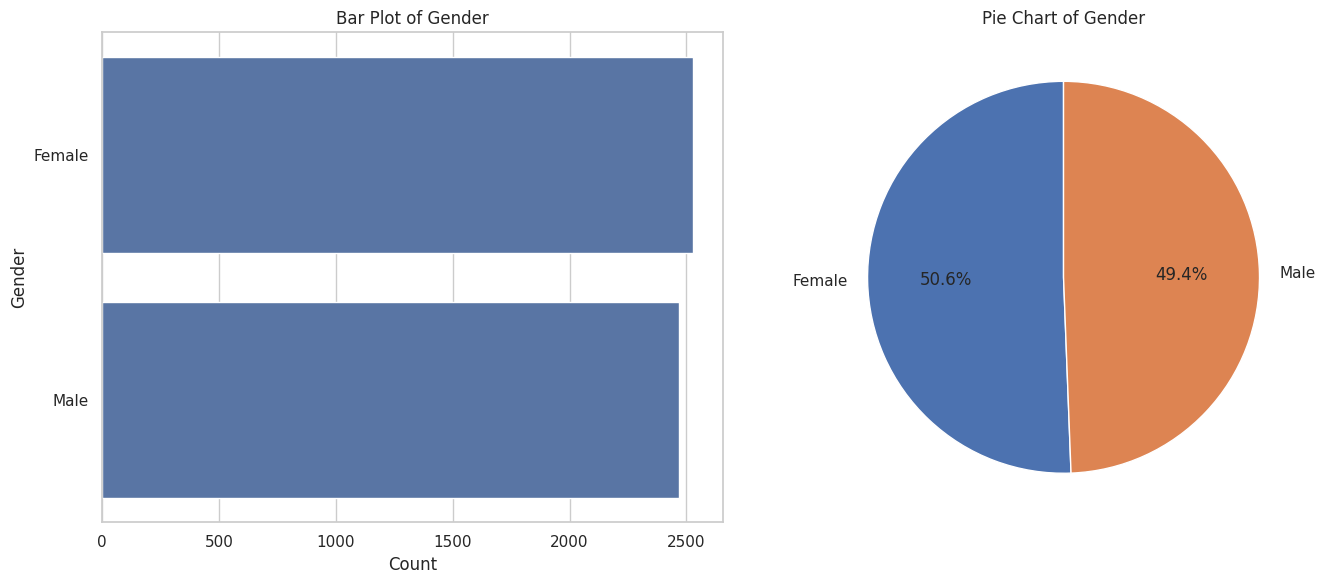

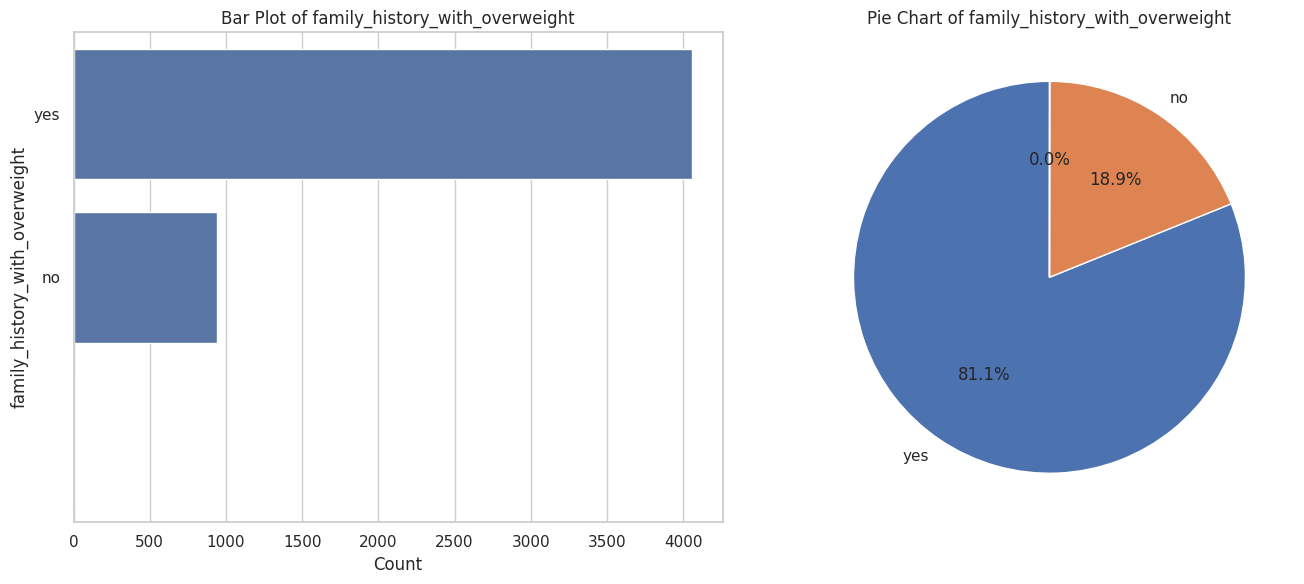

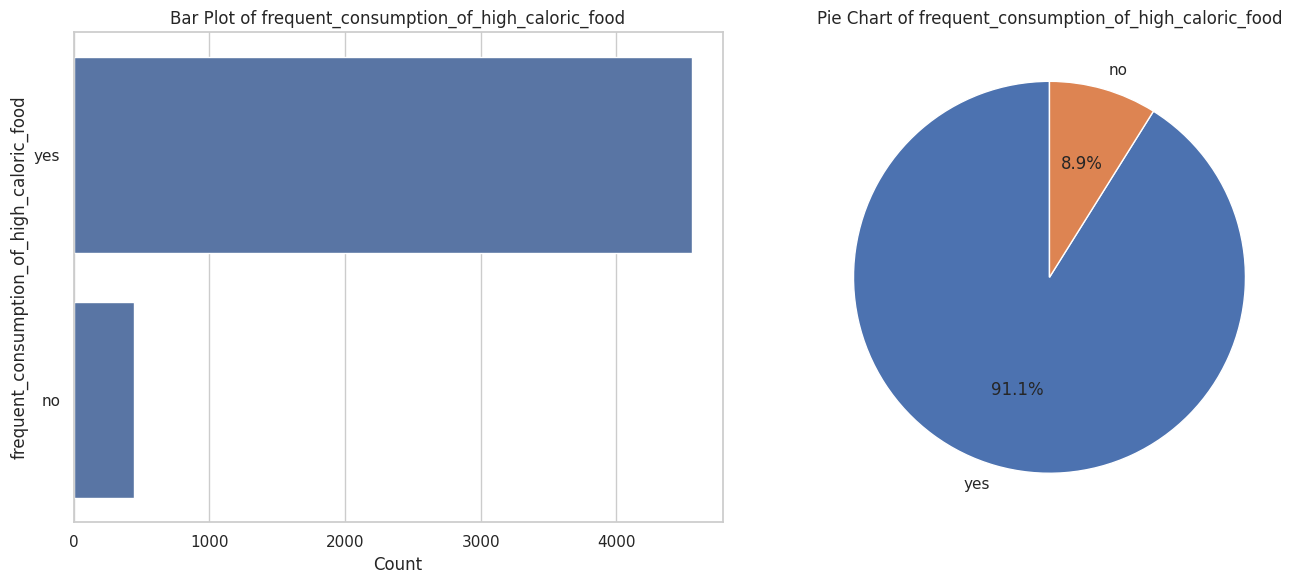

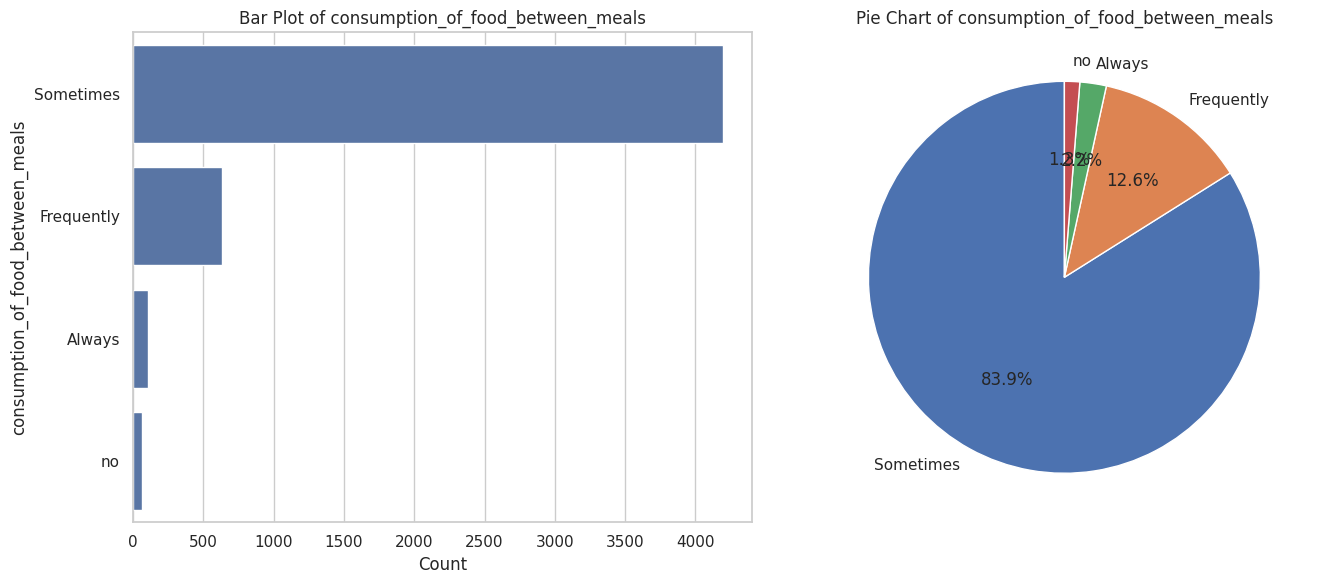

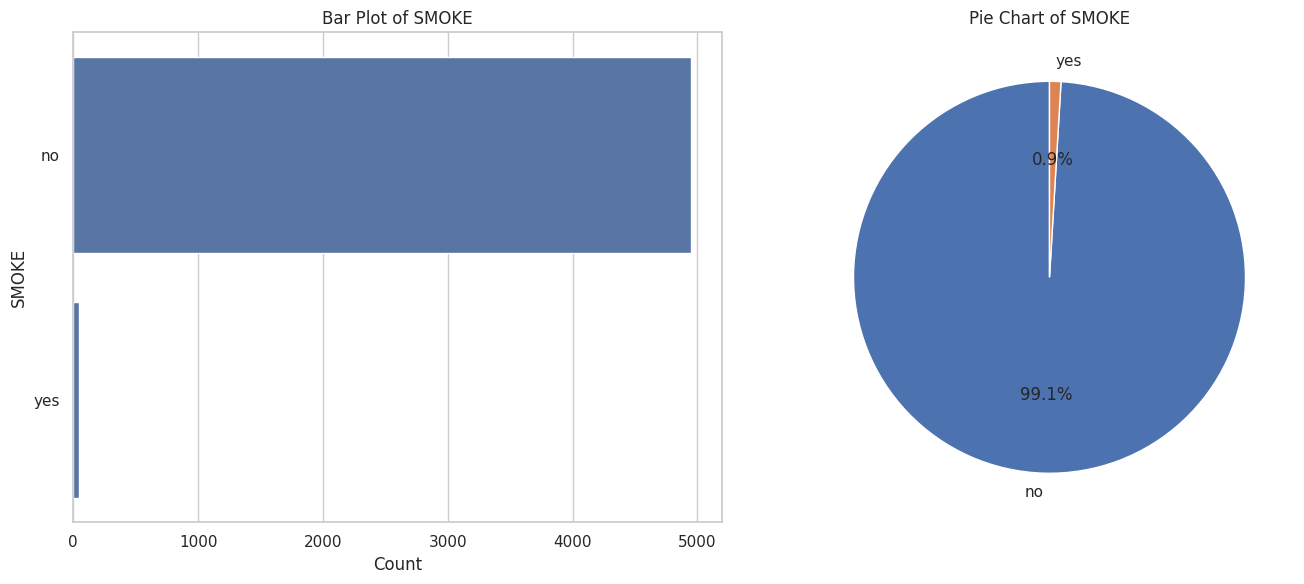

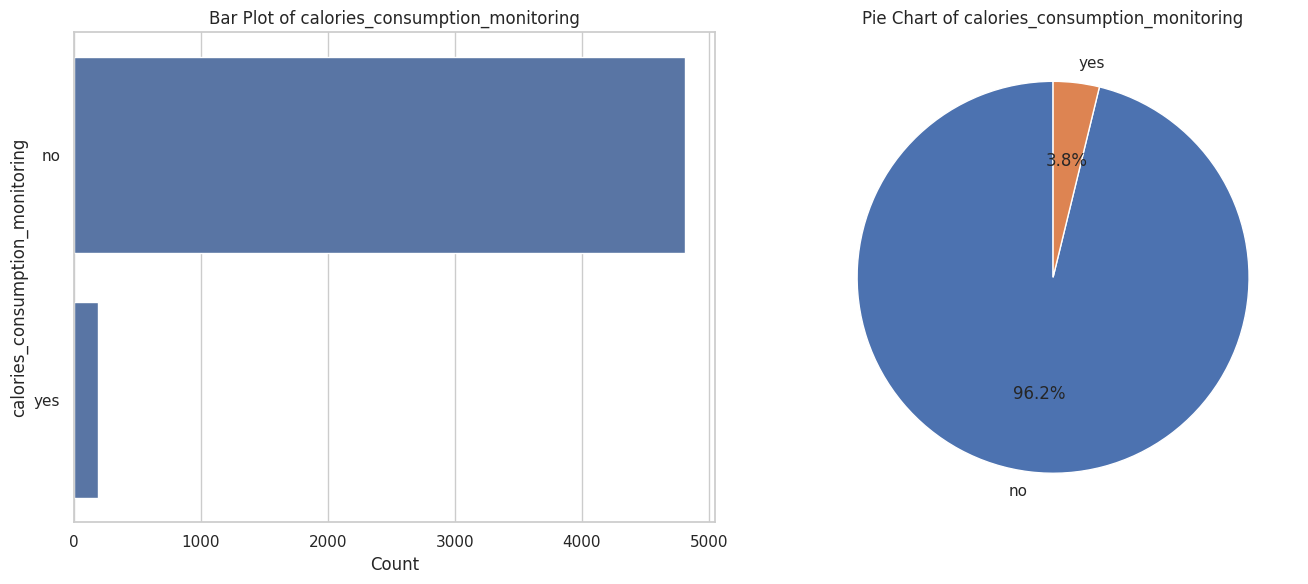

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Function to plot bar graph and pie chart for a column
def plot_column(column_name):
    plt.figure(figsize=(14, 6))

    # Bar plot
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(f'Bar Plot of {column_name}')
    plt.xlabel('Count')

    # Pie chart
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

# List of columns for which we want to generate plots
columns_to_plot = [
    'Gender', 'family_history_with_overweight', 'frequent_consumption_of_high_caloric_food',
    'consumption_of_food_between_meals', 'SMOKE', 'calories_consumption_monitoring'
]

# Generate plots for each column
for col in columns_to_plot:
    plot_column(col)
